<a href="https://colab.research.google.com/github/D34dP0oL/4216_Biomedical_DS_and_AI/blob/main/Sheet5/Assignment5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import math
import pandas as pd

from scipy.stats import poisson, sem, poisson, ttest_ind, shapiro, mannwhitneyu
import scipy.stats as stats # for 'f_oneway'
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial import distance

from IPython.display import Image

# from sklearn import linear_model 
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import brier_score_loss

# import statsmodels.formula.api as sm # get ANOVA table as R like output
# from statsmodels.formula.api import ols # Ordinary Least Squares (OLS) model

import matplotlib.pyplot as plt
# from IPython.display import display, HTML
# from scipy.cluster.hierarchy import dendrogram, linkage
# from mpl_toolkits.mplot3d import Axes3D

## Biomedical Data Science & AI

## Assignment 5

#### Group members:  Fabrice Beaumont, Fatemeh Salehi, Genivika Mann, Helia Salimi, Jonah

---
*COMMENT @ the tutors: If you are not able to provide a ipynb file for these tutorial, could you PLEASE just f***ing stick to either capital or lower case k in "K/k-means"??????????!!!!!
And what is up with the strange exercise naming conventions like in Exercise 3 (same in Ex 3 from assignment 3)?*

---
### Exercise 1 - *k*-means clustering


#### 1.1. Use the $k$-means algorithm and Euclidean distance to cluster the 10 data points into $k=3$ clusters. The coordinates of the data points are given in table 1. Use the data points a4, a5 and a8 as initialization and perform 2 iteration steps. You can do the cluster assignment also visually without computing the exact distances.

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ | $a_6$ | $a_7$ | $a_8$ | $a_9$ | $a_{10}$ |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $(x,y)$ | $(2,1)$ | $(5,7)$ | $(3,2)$ | $(4,8)$ | $(3,1)$ | $(7,4)$ | $(4,6)$ | $(6,4)$ | $(3,7)$ | $(6,3)$ |

In [89]:
 def plot_clustering(data, clusters, membership_vector, title):
    # Plot the data points with the colors of their cluster
    for i, _ in enumerate(data):
        if membership_vector[i] == -1:
            plt.scatter(data[i][0], data[i][1], color="black")
        else:
            plt.scatter(data[i][0], data[i][1], color=center_colors[membership_vector[i]])
    # Plot the cluster centers with different colors
    for i, _ in enumerate(clusters):
        plt.scatter(clusters[i][0], clusters[i][1], marker='+', s=300, color=center_colors[i])

    plt.title(title)
    plt.figure()

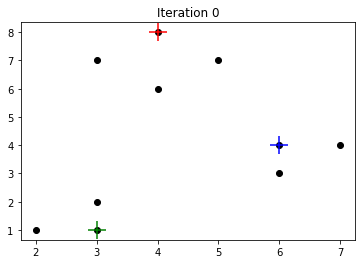

<Figure size 432x288 with 0 Axes>

In [98]:
# We know, that clustering by hand is allowed. Still, we prefer to give some corresponding code

# Initialize cluster centers (usually some sort of randomized)
x_centers = [4, 3, 6]
y_centers = [8, 1, 4]
# A more interesting initialization with the same outcome is:
# x_centers = [3, 5, 6]
# y_centers = [4, 2, 8]
center_colors = ["red", "green", "blue"]

x_data = [2, 5, 3, 4, 3, 7, 4, 6, 3, 6]
y_data = [1, 7, 2, 8, 1, 4, 6, 4, 7, 3]
cluster_memberships = [-1] * len(x_data)

plot_clustering(list(zip(x_data, y_data)), list(zip(x_centers, y_centers)), cluster_memberships, f"Iteration 0")

In [116]:
def my_k_means(data, centers, membership_vector, nr_iterations=2):
    for iteration in range(nr_iterations):
        # Iterate through all points and assign them to their closest cluster
        for point_index, point in enumerate(data):
            min_distance = math.inf

            for center_index, center in enumerate(centers):
                tmp_distance = distance.euclidean(point, center)
                # If a closer center has been found, assign the poitn to it
                if tmp_distance < min_distance:
                    min_distance = tmp_distance
                    membership_vector[point_index] = center_index

        # Redefine the cluster centers
        for cluster_index in range(len(centers)):
            # Add all members of this cluster
            cluster_sum = [0, 0]
            cluster_size = 0
            for point_index, point in enumerate(data):
                if cluster_memberships[point_index] == cluster_index:
                    cluster_sum[0] += point[0]
                    cluster_sum[1] += point[1]
                    cluster_size = cluster_size + 1

            # Get the mean of the cluster
            cluster_mean = [cluster_sum[0] /cluster_size, cluster_sum[1] /cluster_size]
            centers[cluster_index] = (cluster_mean[0], cluster_mean[1])

        # Print the intermediate clustering
        plot_clustering(data, centers, membership_vector, f"Iteration {iteration+1}")

    plt.show()

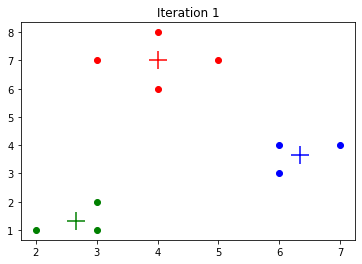

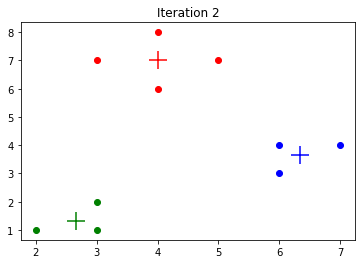

<Figure size 432x288 with 0 Axes>

In [117]:
# Execute the k-means using the initialization from above for two iterations
my_k_means(list(zip(x_data, y_data)), list(zip(x_centers, y_centers)), cluster_memberships, 2)

#### 1.2. Shown are the results of a $k$-means clustering with two different initializations:

In [101]:
!wget https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Sheet5/img_sheet5_ex1-2.png

--2021-05-26 09:56:44--  https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Sheet5/img_sheet5_ex1-2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250464 (245K) [image/png]
Saving to: ‘img_sheet5_ex1-2.png’

img_sheet5_ex1-2.pn 100%[===================>] 244.59K  --.-KB/s    in 0.07s   

2021-05-26 09:56:44 (3.25 MB/s) - ‘img_sheet5_ex1-2.png’ saved [250464/250464]



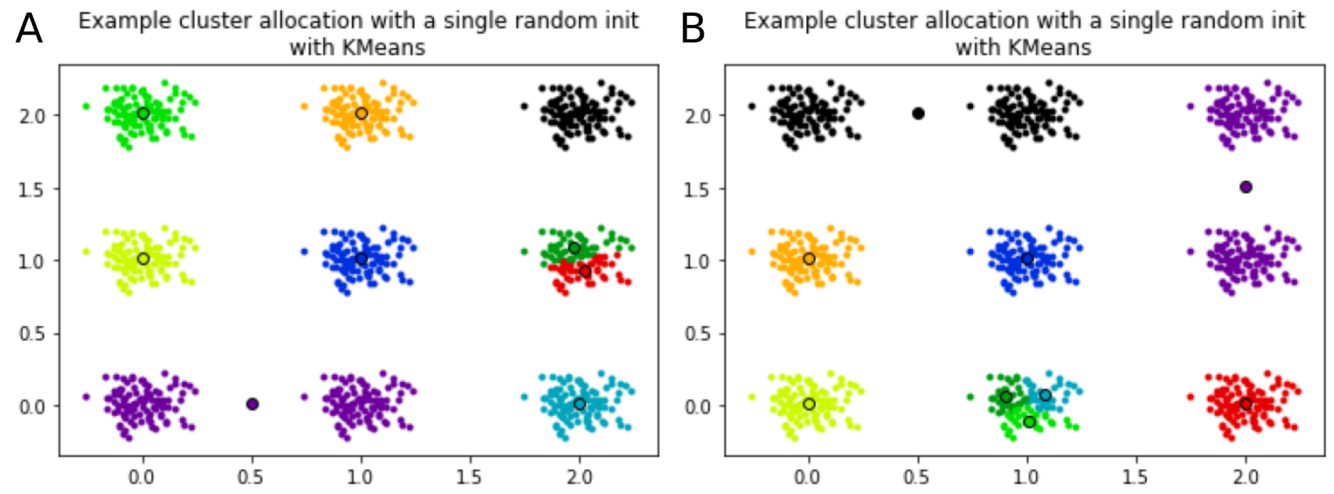

In [102]:
Image('img_sheet5_ex1-2.png')

##### 1.1.a. How does the choice of the initial starting points affect the clustering?

Since in this variant of $k$-means, the number of cluter centers is fixed, the different initial starting points can not affect the number of cluters. However they can effect the **sizes of the clusters**. Most noticable, depending on the starting points, **empty** clusters may appear.

##### 1.1.b. How can you avoid getting a clustering result that is dependent on the initialization?

This is a general question, and not directed at $k$-means. In general, no randomization should take place (e.g. the random initialization of the initializ starting points) to make the algorithm deterministic. Secondly, depending on the expected kind of clustering, different algorithms may simply be more suited by construction. (Note that $k$-means with Euclidean distance for example will always producte convex clusters!)

With respect to $k$-means, the dependence on the initial starting points can be reduced, by 
- **running multiple executions** with different initializations. Then use some measurement to select the most suited outcome. For example by **peanalizing big differences incluster sizes**, or **cluster centers that are close** to each other.
- initializing  **more cluster centers than needed** (**distributed uniformly** over the domain)
- allowing clusters to **collapse** (if the centers are to close) or to
- **vanish** (if empty).

Combinations of these methods are also possible.


##### 1.1.c. What are the pros and cons of the $k$-means clustering?

Pros:
- Simple (easy to implement)
- Few parameters
- Rather fast
- (Mostly) unsupervised

Cons:
- Only convex clusters
- Parameter $k$ with huge impact on the solution
- Will probabilty stuck in a local optima


#### 1.3. Use the provided breast cancer data (`cancer.csv`) to perform a $k$-means clustering. Perform the clustering for a range of clusters between 2 and 10. Set the `random_state` to 20 to keep reproducibility.

In [105]:
breast_cancer_db = pd.read_csv('https://raw.githubusercontent.com/D34dP0oL/4216_Biomedical_DS_and_AI/main/Sheet5/cancer.csv', index_col="Unnamed: 0")
breast_cancer_db.head(4)

,mean radius,mean concavity
0,17.99,0.3001
1,20.57,0.0869
2,19.69,0.1974
3,11.42,0.2414


##### 1.3.a. For each clustering plot the cluster assignment within a scatter plot for the features `mean radius` and `mean concavity`.

##### 1.3.b. For each clustering create silhouette plots and print out the score.

##### 1.3.c. Which is the best choice for the number of clusters? Why?

#### 1.4. Explain the difference between $k$-means and $k$-medoids.

---
### Exercise 2 - Gaussian misture models

#### 2.1. Explain the EM-Algorithm in your own words, without using any formula. 

#### 2.2.  The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has three features and you want to cluster it into 2 clusters.

##### 2.2.a. How many parameters (depending on the number of clusters) need to be estimated in the most general model (no restrictions on the covariances)?

##### 2.2.b. Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?

##### 2.2.c. Assuming that there is neither correlation nor does the variation for each feature change. How many parameters does the model have to estimate now?

#### 2.3. Cluster the breast cancer dataset (on the entire dataset: `cancer_all.csv`) with the help of a Gaussian mixture model. Perform the clustering for a range of clusters between 2 and 10 and for all possible assumptions for the covariance matrices. Plot the BIC of each clustering.

##### 2.3.a. Which is the best choice for the clustering? Why?

##### 2.3.b. Plot the data (features `mean radius` and `mean compactness`), the cluster assignment and ellipses (to show the Gaussian component) for your selected model.

#### 2.4. How does the $k$-means model differ from the GMM model? Which model would you prefer for the given data and why?

#### 2.5. Generate the $k$-Means model for the entire dataset and visualise both $k$-Mean and GMM models using PCA.

#### 2.6. What are the advantages of GMMs over $k$-means?

---
### Exercise 3 - Consensus clustering

Perform (k-means) consensus clustering of samples for the given gene
expression data allData.csv. Take minimum clusters as 2, maximum clusters as
6, resampling proportion as 80% and number of iterations as 10. Find the
following:

#### 3.1. Best number of clusters.

#### 3.2. Change in area under CDF.

#### 3.3. Best cluster from the consensus matrix for each sample.